# Don't Hate, Collaborate
This notebok is for the photometric and I and V band data for Nova Musca 1991 taken with SMARTS/ANDCIAM which we are collaborating with Jeff McClintock et al.

In the IPython Notebook "NovaMuscaCalibration" we detailed how we generated all the data for Nova Musca, including its calibration and other stuff. 

This notebook is jut about identifying the horrible outliers and packaging the data nicely for Jeff and his team

In [118]:
#start off by importing some useful things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
#the punch line of the last notebook was these two output files, which have calibrated data and other meta data
NMI=pd.read_csv('NMI.csv')
NMV=pd.read_csv('NMV.csv')

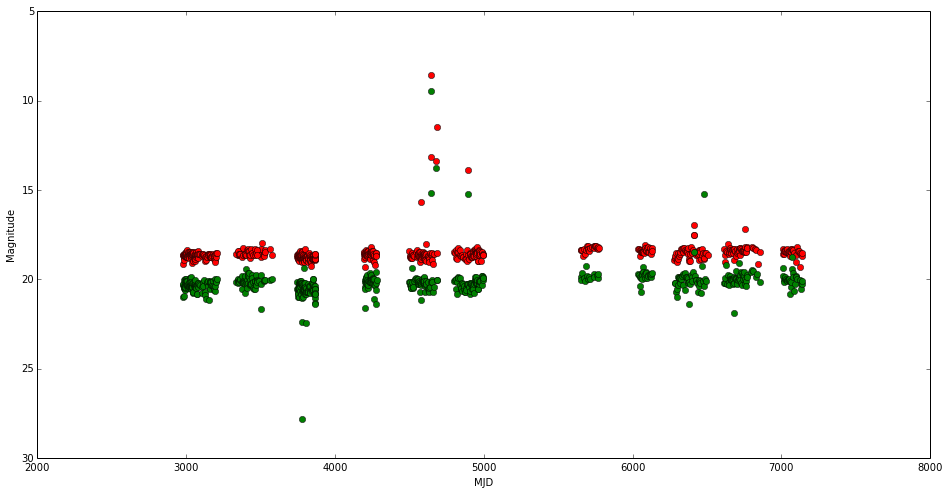

In [120]:
#here's a quick light curve of what we've got so far
#there are some horrifically catastrophic outliers, as you can see
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)

ax.plot(NMI.juliandate - 2450000, NMI.NMcal, 'ro')
ax.plot(NMV.juliandate- 2450000, NMV.NMcal, 'go')

ax.invert_yaxis()
ax.set_ylabel('Magnitude')
ax.set_xlabel('MJD')

In [165]:
#lets try to identify some of the outliers
#for I we can see there is a population that appear too bright for their own good.
NMI[(NMI.NMcal < 18.1)| (NMI.NMraw > 25)]

,Unnamed: 0,date,juliandate,NMraw,mag3,mag4,mag5,mag9,mag10,mag17,mag19,mag20,merr1,offset,std,NMcal
75,75,50518,2453509.60617,21.803,19.139,19.639,21.471,19.346,18.517,20.697,19.658,20.642,0.030,3.834875,0.023345,17.968125
246,246,80422,2454579.65786,22.278,19.017,19.511,21.410,19.215,41.446,20.561,19.518,20.513,0.054,6.595125,8.154307,15.682875
263,263,80525,2454612.57781,22.416,19.712,20.211,22.100,19.907,19.080,21.234,20.217,21.233,0.041,4.408000,0.011928,18.008000
271,271,80627,2454645.55594,22.512,19.075,19.574,21.448,NaN,57.455,20.616,19.565,20.564,0.058,9.339571,14.748050,13.172429
272,272,80628,2454646.57908,22.123,19.391,19.898,21.762,NaN,84.962,20.936,19.885,20.915,0.032,13.547000,25.022198,8.576000
278,278,80729,2454677.47448,22.314,19.123,19.619,21.497,18.968,59.662,20.673,19.611,20.602,0.046,8.915625,14.577588,13.398375
280,280,80807,2454686.47433,22.132,18.975,19.479,21.343,NaN,67.231,20.493,19.477,20.453,0.047,10.647286,18.482213,11.484714
301,301,90303,2454894.73664,17.870,19.300,19.789,21.619,19.484,18.667,20.850,19.808,20.777,0.001,3.983000,0.024692,13.887000
377,377,120601,2456080.50432,21.643,18.872,19.354,21.262,19.076,18.237,20.384,19.367,20.387,0.046,3.563625,0.012861,18.079375
399,399,130119,2456312.83233,25.395,20.823,21.239,23.259,21.052,20.186,22.317,21.289,22.216,0.752,5.493875,0.051265,19.901125


index 246, 271, 272, 278 and 280 look like something went wrong with their offset calculation. the variances of the offset are very large, and the instrumental magnitudes for star 10 are enormous. it looks like star 10 was falling of the detector on those nights. lets just throw those away.
I suspect source confusion for 301, because nova musca's raw instrumental magnitude is abnormally high.
index 421 and 479 look brighter than normal, but I can't rule them out otherwise. Lets look closer at these to see if they indeed do suffer from source confusion

In [133]:
#we also made these two output files which detail the x and y coordinate shift in nova musca's calculated centroid
#from iraf's photometry
Ideltaxy=pd.read_table('Ixyshift.out', names=['image','juliandate','id','xshift','yshift'], sep='\s+')
#lets look for points where the change in either the x or y direction for NM was greater than 2 pixels
Ideltaxy[(Ideltaxy.id == 1) & ((np.abs(Ideltaxy.xshift) > 3 ) 
                               | (np.abs(Ideltaxy.yshift) > 3))]

,image,juliandate,id,xshift,yshift
7100,rccd080628.0036_gregist,2454646.57908,1,3.079,-0.331
7680,rccd090303.0070_gregist,2454894.73664,1,28.944,-10.692
10080,rccd130427.0056_gregist,2456410.69824,1,11.421,-7.149
10100,rccd130501.0051_gregist,2456414.61704,1,4.963,-1.405
10120,rccd130501.0052_gregist,2456414.61704,1,4.963,-1.405
11240,rccd140403.0054_gregist,2456751.62630,1,8.370,-5.581


our suspicions were confirmed! the centroids marked in the photometry for data taken 90303, 130427, and 140403 are indeed suffering from source confusion. we should throw them out as well, along with these other points we found. lets find their indexes as well so we can throw them out.
I examined the remainder by hand and saw they have cosmic rays near NM

In [134]:
badshiftdates=Ideltaxy[(Ideltaxy.id == 1) & ((np.abs(Ideltaxy.xshift) > 3 ) 
                               | (np.abs(Ideltaxy.yshift) > 3))].juliandate

NMI[NMI.juliandate.isin(badshiftdates.values)]

,Unnamed: 0,date,juliandate,NMraw,mag3,mag4,mag5,mag9,mag10,mag17,mag19,mag20,merr1,offset,std,NMcal
272,272,80628,2454646.57908,22.123,19.391,19.898,21.762,NaN,84.962,20.936,19.885,20.915,0.032,13.547000,25.022198,8.576000
301,301,90303,2454894.73664,17.870,19.300,19.789,21.619,19.484,18.667,20.850,19.808,20.777,0.001,3.983000,0.024692,13.887000
421,421,130427,2456410.69824,20.691,19.028,19.558,21.475,19.253,18.421,20.588,19.561,20.563,0.018,3.752125,0.018902,16.938875
422,422,130501,2456414.61704,22.602,20.385,20.864,22.820,20.618,19.770,21.809,20.914,21.893,0.061,5.080375,0.049324,17.521625
423,423,130501,2456414.61704,22.602,20.385,20.864,22.820,20.618,19.770,21.809,20.914,21.893,0.061,5.080375,0.049324,17.521625
479,479,140403,2456751.62630,21.012,19.117,19.613,21.506,19.311,18.469,20.671,19.636,20.615,0.014,3.813500,0.011212,17.198500


In [166]:
#alright, now lets gather these all up by their indicies and store them
indeciesToDropI=NMI[(NMI.NMcal < 18.1) | (NMI.NMraw > 25)].index + NMI[NMI.juliandate.isin(badshiftdates.values)].index

now we need to do a simmilar exercise with the V band data. There are also some points that are just too faint for their own good as well.

In [161]:
NMV[(NMV.NMraw > 25) | (NMV.NMcal < 19.6)]

,Unnamed: 0,date,juliandate,NMraw,mag3,mag4,mag9,mag10,mag17,mag19,mag20,merr1,offset,std,NMcal
120,120,50202,2453404.79503,22.625,19.881,20.350,19.659,19.142,21.067,20.006,21.359,0.045,3.170571,0.018752,19.454429
151,151,50511,2453502.52999,25.826,20.918,21.373,20.664,20.118,22.079,21.015,22.375,0.623,4.181714,0.031737,21.644286
187,187,60211,2453778.69813,30.921,19.828,20.289,19.604,19.080,21.007,19.973,21.318,NaN,3.118429,0.018822,27.802571
188,188,60212,2453779.75572,25.484,19.841,20.259,19.590,19.065,20.986,19.964,21.258,1.270,3.099000,0.023509,22.385000
199,199,60226,2453793.69152,22.505,19.866,20.314,19.611,19.092,21.023,19.988,21.323,0.028,3.135286,0.020180,19.369714
208,208,60310,2453805.69338,25.573,19.839,20.286,19.588,19.069,20.994,19.961,21.332,0.886,3.114143,0.022371,22.458857
244,244,70408,2454199.68882,25.248,20.365,20.789,20.126,19.594,21.527,20.480,21.815,0.446,3.632286,0.020312,21.615714
261,261,70511,2454232.67662,25.023,21.607,22.075,21.363,20.842,22.806,21.720,23.109,0.242,4.893143,0.030041,20.129857
279,279,70611,2454263.55138,25.677,21.299,21.739,21.050,20.513,22.491,21.408,22.776,0.396,4.572286,0.030429,21.104714
281,281,70620,2454272.49163,23.077,19.832,20.270,19.596,21.853,20.987,19.941,21.301,0.066,3.501429,1.036996,19.575571


OK a few things to note. index 187 the instrumental magnitude is 30.921. that is crazy. throw it away.
index 188 and 208 have instrumental magnitudes that are > 25. that also makes no sense, since 25 is the instrumental zero point. they can go also.
index 336, 337, and 343 have very faint magnitudes for star 10, i bet it was also falling of the detector. the nights line up with the I band nights for this error too. those points can go. 

the others i cant immediately explain. but notice that two of them are from the dates where we threw I band data away form bad shifts. so lets investigate to see if they have crazy shifts as well

In [126]:
Vdeltaxy=pd.read_table('Vxyshift.out', names=['image','juliandate','id','xshift','yshift'], sep='\s+')
#lets look for points where the change in either the x or y direction for NM was greater than 3 pixels
Vdeltaxy[(Vdeltaxy.id == 1) & ((np.abs(Vdeltaxy.xshift) > 3 ) 
                               | (np.abs(Vdeltaxy.yshift) > 3))]

,image,juliandate,id,xshift,yshift
4220,rccd060321.0051_gregist,2453816.66211,1,-3.561,-1.509
4520,rccd060424.0028_gregist,2453850.52536,1,-4.204,-3.704
5840,rccd080216.0061_gregist,2454513.74810,1,-6.031,-7.516
7400,rccd090303.0071_gregist,2454894.74770,1,28.922,-10.362
8300,rccd110507.0040_gregist,2455689.60005,1,-4.871,-1.607
9580,rccd130501.0052_gregist,2456414.62466,1,10.861,-5.448
9820,rccd130621.0006_gregist,2456465.52593,1,-2.000,-3.434
9880,rccd130707.0003_gregist,2456481.49146,1,29.048,-10.524
10000,rccd131201.0094_gregist,2456628.82075,1,3.324,-0.266
10460,rccd140224.0055_gregist,2456713.72541,1,-3.694,4.050


our suspicions are confirmed here too! we also have a few other points where the shift was too high. lets play it safe and just get rid of them all, gathering thier indicies up in a varriable. i examined the remaining frames by hand and saw that they contained cosmic rays or very bright pixels next to NM that snuck into the appeture.

In [127]:
badshiftdatesV=Vdeltaxy[(Vdeltaxy.id == 1) & ((np.abs(Vdeltaxy.xshift) > 3 ) 
                               | (np.abs(Vdeltaxy.yshift) > 3))].juliandate

NMV[NMV.juliandate.isin(badshiftdatesV.values)]

,Unnamed: 0,date,juliandate,NMraw,mag3,mag4,mag9,mag10,mag17,mag19,mag20,merr1,offset,std,NMcal
211,211,60321,2453816.66211,23.414,19.842,20.290,19.596,19.078,21.017,19.980,21.316,0.082,3.121286,0.019653,20.292714
226,226,60424,2453850.52536,23.144,19.917,20.354,19.664,19.151,21.077,20.035,21.363,0.048,3.184429,0.017067,19.959571
292,292,80216,2454513.74810,22.407,19.779,20.194,19.542,19.016,20.935,19.921,21.249,0.028,3.052286,0.020361,19.354714
370,370,90303,2454894.74770,18.253,19.748,20.184,19.490,18.979,20.922,19.884,21.219,0.001,3.022286,0.020353,15.230714
415,415,110507,2455689.60005,23.741,21.189,21.626,20.925,20.409,22.377,21.282,22.661,0.072,4.457000,0.028734,19.284000
491,491,130621,2456465.52593,22.073,19.520,19.960,19.261,18.732,20.702,19.659,21.008,0.076,2.796000,0.030227,19.277000
500,500,131201,2456628.82075,22.158,19.664,20.099,19.417,18.907,20.841,19.790,21.104,0.030,2.936000,0.018974,19.222000
523,523,140224,2456713.72541,22.116,19.750,20.193,19.503,18.911,20.918,19.852,21.219,0.032,3.010857,0.045576,19.105143


In [128]:
#for some reason two rows didnt show up, but I found em.
NMV[NMV.date.isin([130501 ,130707])]

,Unnamed: 0,date,juliandate,NMraw,mag3,mag4,mag9,mag10,mag17,mag19,mag20,merr1,offset,std,NMcal
479,479,130501,2456414.62466,23.204,21.438,21.899,21.209,20.707,22.542,21.608,22.891,0.078,4.717714,0.031695,18.486286
494,494,130707,2456481.49146,18.109,19.601,20.017,19.341,18.833,20.739,19.721,21.028,0.001,2.858571,0.017756,15.250429


In [158]:
#OK now lets gather all them up in an index
indeciesToDropV= NMV[(NMV.NMraw > 25) | (NMV.NMcal < 19.6)].index + NMV[NMV.juliandate.isin(badshiftdatesV.values)].index + NMV[NMV.date.isin([130501 ,130707])].index

In [159]:
indeciesToDropV

Int64Index([120, 151, 187, 188, 199, 208, 211, 226, 244, 261, 279, 281, 292, 336, 337, 343, 370, 415, 434, 439, 478, 479, 491, 494, 500, 513, 516, 523, 534, 541, 542, 543, 547, 563, 564], dtype='int64')

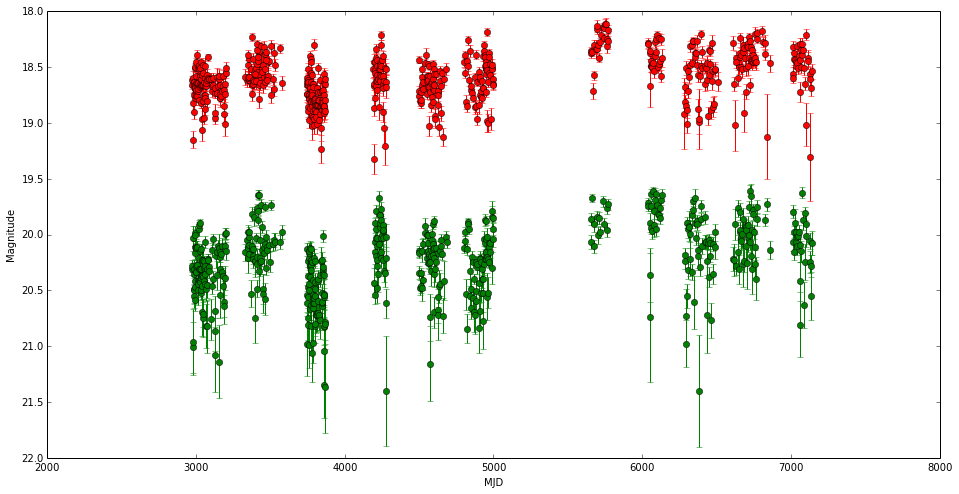

In [167]:
#now lets try remaking that plot!
#here's a quick light curve of what we've got so far
#there are some horrifically catastrophic outliers, as you can see
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)

ax.errorbar(NMI.drop(indeciesToDropI).juliandate - 2450000, NMI.drop(indeciesToDropI).NMcal, yerr=NMI.drop(indeciesToDropI).merr1, fmt='ro')
ax.errorbar(NMV.drop(indeciesToDropV).juliandate - 2450000, NMV.drop(indeciesToDropV).NMcal, yerr=NMV.drop(indeciesToDropV).merr1, fmt='go')

ax.invert_yaxis()
ax.set_ylabel('Magnitude')
ax.set_xlabel('MJD')


In [104]:
calI=pd.read_csv('photCalI.csv').drop('Unnamed: 0', axis=1)
calV=pd.read_csv('photCalV.csv').drop('Unnamed: 0', axis=1)
IVCalmerge=pd.merge(calI, calV, on='date', how='inner')

In [117]:
pd.DataFrame({'NMIV':(IVCalmerge.mag1_x - IVCalmerge.mag1_y).describe(),
              'mag3IV':(IVCalmerge.mag3_x - IVCalmerge.mag3_y).describe(),
              'mag4IV':(IVCalmerge.mag4_x - IVCalmerge.mag4_y).describe(),
              'mag5IV':(IVCalmerge.mag5_x - IVCalmerge.mag5_y).describe(),
              'mag9IV':(IVCalmerge.mag9_x - IVCalmerge.mag9_y).describe(),
              'mag10IV':(IVCalmerge.mag10_x - IVCalmerge.mag10_y).describe(),
              'mag17IV':(IVCalmerge.mag17_x - IVCalmerge.mag17_y).describe(),
              'mag19IV':(IVCalmerge.mag19_x - IVCalmerge.mag19_y).describe()}).loc[['mean','std']]

,NMIV,mag10IV,mag17IV,mag19IV,mag3IV,mag4IV,mag5IV,mag9IV
mean,-1.699006,-1.291739,-1.044645,-1.039330,-1.419848,-1.367427,-1.168337,-0.968922
std,0.699559,0.044498,0.043902,0.037343,0.035331,0.035353,0.069931,0.035519


In [110]:
#some points survieved. I'm curious about them
NMI.columns

Index([u'Unnamed: 0', u'date', u'juliandate', u'NMraw', u'mag3', u'mag4', u'mag5', u'mag9', u'mag10', u'mag17', u'mag19', u'mag20', u'merr1', u'offset', u'std', u'NMcal'], dtype='object')

In [163]:
NMI[NMI.NMcal < 18.1]

,Unnamed: 0,date,juliandate,NMraw,mag3,mag4,mag5,mag9,mag10,mag17,mag19,mag20,merr1,offset,std,NMcal
75,75,50518,2453509.60617,21.803,19.139,19.639,21.471,19.346,18.517,20.697,19.658,20.642,0.030,3.834875,0.023345,17.968125
246,246,80422,2454579.65786,22.278,19.017,19.511,21.410,19.215,41.446,20.561,19.518,20.513,0.054,6.595125,8.154307,15.682875
263,263,80525,2454612.57781,22.416,19.712,20.211,22.100,19.907,19.080,21.234,20.217,21.233,0.041,4.408000,0.011928,18.008000
271,271,80627,2454645.55594,22.512,19.075,19.574,21.448,NaN,57.455,20.616,19.565,20.564,0.058,9.339571,14.748050,13.172429
272,272,80628,2454646.57908,22.123,19.391,19.898,21.762,NaN,84.962,20.936,19.885,20.915,0.032,13.547000,25.022198,8.576000
278,278,80729,2454677.47448,22.314,19.123,19.619,21.497,18.968,59.662,20.673,19.611,20.602,0.046,8.915625,14.577588,13.398375
280,280,80807,2454686.47433,22.132,18.975,19.479,21.343,NaN,67.231,20.493,19.477,20.453,0.047,10.647286,18.482213,11.484714
301,301,90303,2454894.73664,17.870,19.300,19.789,21.619,19.484,18.667,20.850,19.808,20.777,0.001,3.983000,0.024692,13.887000
377,377,120601,2456080.50432,21.643,18.872,19.354,21.262,19.076,18.237,20.384,19.367,20.387,0.046,3.563625,0.012861,18.079375
421,421,130427,2456410.69824,20.691,19.028,19.558,21.475,19.253,18.421,20.588,19.561,20.563,0.018,3.752125,0.018902,16.938875


In [164]:
indeciesToDropI

Int64Index([246, 271, 272, 278, 280, 301, 399, 421, 422, 423, 479], dtype='int64')

In [189]:
NMI.drop(indeciesToDropI).ix[:,['juliandate','NMcal','merr1']].applymap(lambda x: '%.3f' % x).to_csv('NovaMusca1991_Iband.txt', sep=' ', index=False)

In [190]:
NMV.drop(indeciesToDropV).ix[:,['juliandate','NMcal','merr1']].applymap(lambda x: '%.3f' % x).to_csv('NovaMusca1991_Vband.txt', sep=' ', index=False)